In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
import pandas as pd

In [3]:
from metamod.utils import ResultsManager, single_task_plot, task_switch_plot, cat_assimilation_plot, task_engagement_plot, \
    load_single_layer_vars, single_neuron_param_plot, SingleLayerManager, single_neuron_baseline_plot, class_prop_plot, \
    task_modulation_plot, plot_maml_results, plot_optimal_lr
plt.rcParams['text.usetex'] = True

# Single neuron results

In [4]:
results_path = "../results/testing_square_loss_single_neuron_22-01-2023_19-56-03-009"
result_manager = SingleLayerManager(results_path)

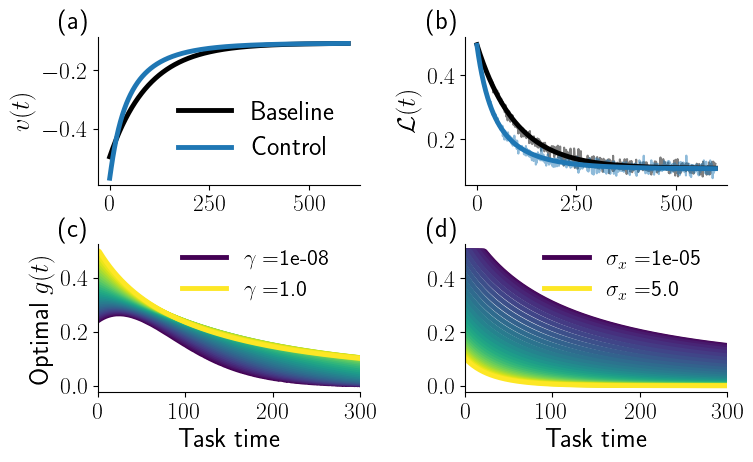

In [6]:
figsize = np.array((16, 6/5*3.5))*1.1
fontsize = 19
line_width = 3.5
subplot_labels = np.array([["(a)", "(b)"], ["(b)", "(d)"]])
f, ax = plt.subplots(2, 4, figsize=figsize)
ax1 = ax[0, :]
ax1 = np.reshape(ax1, (2, 2))
ax2 = ax[1, :]
ax2 = np.reshape(ax2, (2, 2))

weight_legend_pos = (0.6, 1.1)

single_neuron_baseline_plot(result_manager, ax=ax1, 
                            figsize=figsize, fontsize=fontsize, 
                            line_width=line_width, subplot_labels=subplot_labels)

results_per_var, ranges = load_single_layer_vars()
line_width = 3.5
selected_vars = ["gamma", "sigmas"]
var_label = [r"$\gamma=$", r"$\sigma_{x}=$"]
x_lim_vars = [(0, 300), (0, 300)]
subplot_labels = np.array([["(c)", "(d)"], ["(f)", "(h)"]])

single_neuron_param_plot(results_per_var, ax=ax2, figsize=figsize, 
                         fontsize=fontsize, line_width=line_width, selected_vars=selected_vars,
                         x_lim_vars=x_lim_vars, var_label=var_label, subplot_labels=subplot_labels,
                         weight_legend_pos = weight_legend_pos)

ax1[1, 0].remove()
ax1[1, 1].remove()
ax2[1, 0].remove()
ax2[1, 1].remove()

ax2[0, 0].set_xlabel("Task time", fontsize=fontsize)
ax2[0, 1].set_xlabel("Task time", fontsize=fontsize)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("paper_v2/poster_single_neuron.pdf", bbox_inches="tight")
# f.tight_layout()

# Gain modulation 

### Results from ../results/task_switch_less_reg_longer/slow_switch_run0_AffineCorrelatedGaussian_18-01-2023_19-32-18-232 ###
### Param Keys ###
--- dataset_params ---
dataset1_params, dataset2_params, dataset_classes, change_tasks_every, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, change_task_every, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_g, control_lr, in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, change_task_every, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iter

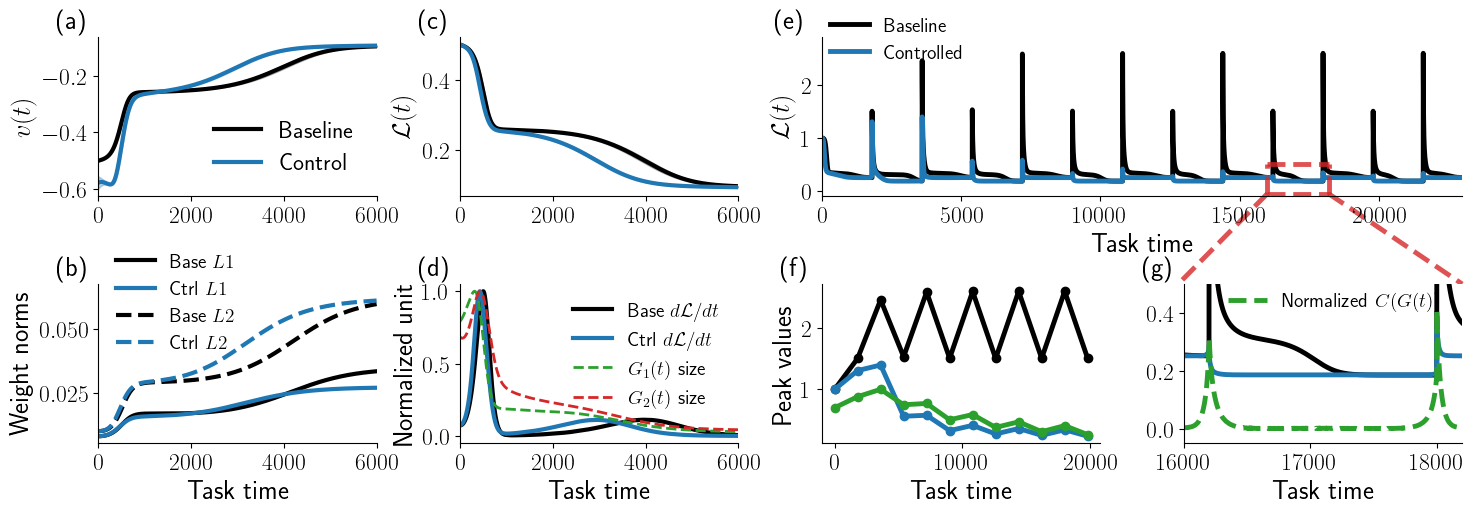

In [9]:
mnist_dir_list = glob.glob("../results/single_task_more_iters/run_id_*_MNIST*")
results = []
for result_dir in mnist_dir_list:
    results.append(ResultsManager(result_dir))

figsize = np.array((16, 6/5*4))*1.1
fontsize = 19
reduce_fontsize = 5
# weight_norm_ylim = (0, 0.1)
weight_legend_pos = (0, 1.3)

f = plt.figure(figsize=figsize)
hspace = 0.55
gs = mpl.gridspec.GridSpec(2, 4, wspace=0.3, hspace=hspace) 

ax_0 = f.add_subplot(gs[0, 0])  
ax_1 = f.add_subplot(gs[0, 1])  
ax_2 = f.add_subplot(gs[1, 0])  
ax_3 = f.add_subplot(gs[1, 1])
ax0 = f.add_subplot(gs[0, 2:])  # full first row
ax1 = f.add_subplot(gs[1, 2])  # second row, first col
ax2 = f.add_subplot(gs[1, 3])

ax = np.array([ax_0, ax_1, ax_2, ax_3])

subplot_labels = np.array([["(a)", "(c)"], ["(b)", "(d)"]])
subplot_labels = subplot_labels.flatten()

ax = single_task_plot(results, ax=ax, fontsize=fontsize, line_width=3, x_lim=(0, 6000), 
                      skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels,
                      reduce_fontsize=reduce_fontsize, weight_legend_pos=weight_legend_pos)

results_path = "../results/task_switch_less_reg_longer/slow_switch_run0_AffineCorrelatedGaussian_18-01-2023_19-32-18-232"

results = ResultsManager(results_path, verbose=True)

line_width = 3.5
zoom_xlim = (16000, 18200)
zoom_ylim = (-0.05, 0.5)
subplot_labels = np.array(["(a)", "(b)", "(c)"])
hspace = 0.55
legend_pos = (0, 1.17)
legend_pos2 = (0.13, 1)
line_pos_y = 1.75


task_switch_plot(results, ax0=ax0, ax1=ax1, ax2=ax2, 
                 figsize=figsize, fontsize=fontsize, line_width=line_width, 
                 zoom_xlim=zoom_xlim, zoom_ylim=zoom_ylim, subplot_labels=subplot_labels, 
                 hspace=hspace, legend_pos=legend_pos, legend_pos2=legend_pos2, line_pos_y=line_pos_y,
                 reduce_fontsize=reduce_fontsize)



plt.savefig("paper_v2/gain_modulation_poster.pdf", bbox_inches="tight")
# f.tight_layout()
plt.show()

# Task class modulation

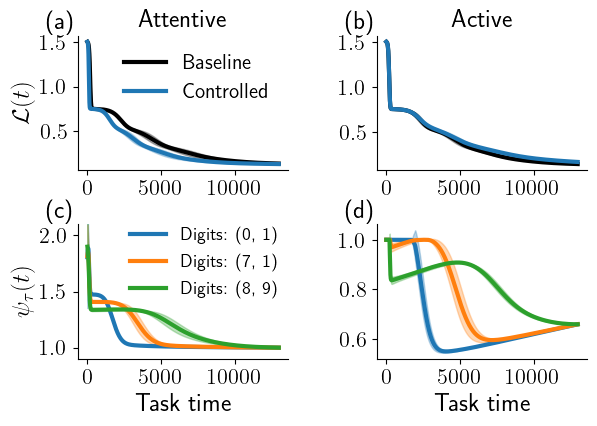

In [6]:
results_path1_list = glob.glob("../results/task_engagement/*MNIST-3_active*")
results_path2_list = glob.glob("../results/task_engagement/*MNIST-3_attention*")
results_path3_list = glob.glob("../results/task_engagement/*MNIST-3_vector*")

results = []
results_list1 = [ResultsManager(path_) for path_ in results_path1_list]
results_list2 = [ResultsManager(path_) for path_ in results_path2_list]
results_list3 = [ResultsManager(path_) for path_ in results_path3_list]
results = [results_list1, results_list2, results_list3]

figsize = np.array((24, 6/5*3.5))
f, ax = plt.subplots(2, 6, figsize=figsize)
ax1 = ax[:, :3].T
ax2 = ax[:, 3:].T
fontsize = 18
line_width = 3
ylim2 = [0.9, 2.1]
ylim3 = [0.4, 1.8]
subplot_labels = np.array([["(a)", "(c)"], ["(b)", "(d)"], ["(e)", "(f)"]])

weight_legend_pos = (0.6, 1.1)
ax1 = task_engagement_plot(results[0], results[1], results[2], figsize=figsize, ax=ax1, fontsize=fontsize, 
                          line_width=line_width, ylim2=ylim2, subplot_labels=subplot_labels, ylim3=ylim3,
                           weight_legend_pos = weight_legend_pos)

results_path1_list = glob.glob("../results/cat_prop/*Semantic*beta_5.0*")
results_path2_list = glob.glob("../results/cat_prop/*MNIST*beta_5.0*")

results = []
results_list1 = [ResultsManager(path_) for path_ in results_path1_list]
results_list2 = [ResultsManager(path_) for path_ in results_path2_list]
results = [results_list1, results_list2]


line_width = 3
subplot_labels = np.array([["(h)", "(i)"], ["(j)", "(k)"], ["(l)", "(m)"]])
xlim1 = (0, 3100)
analysis_path = "../results/cat_prop/feedback_curriculum.pkl"
window_size = 300
zoom_xlim = (0, 1500)
zoom_ylim = (0.4, 0.485)
weight_legend_pos = (0.6, 1.2)

class_prop_plot(results[0], results[1], figsize=figsize, fontsize=fontsize, line_width=line_width,
                subplot_labels=subplot_labels, xlim1=xlim1, analysis_path=analysis_path, window_size=window_size,
                zoom_xlim=zoom_xlim, zoom_ylim=zoom_ylim, ax=ax2, weight_legend_pos=weight_legend_pos)

ax2 = ax2.flatten()
for a in ax2:
    a.remove()
    
ax1[2, 0].remove()
ax1[2, 1].remove()

plt.subplots_adjust(hspace=0.4, wspace=0.42)
plt.savefig("paper_v2/task_engagement_poster.pdf", bbox_inches="tight")

# Meta learning comparison

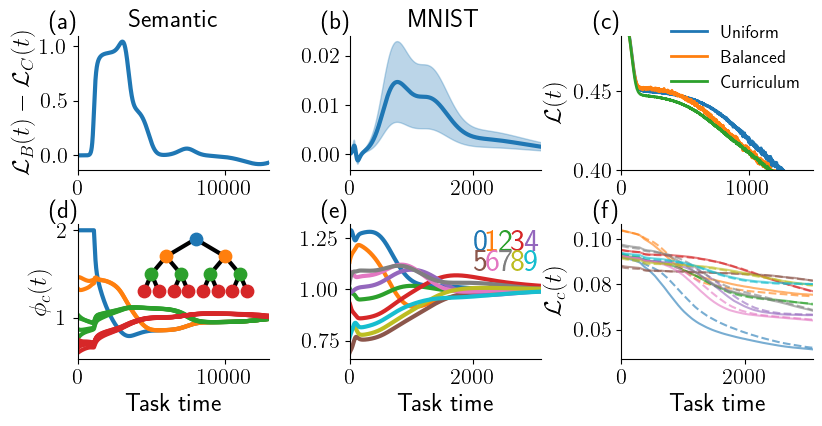

In [8]:
results_path1_list = glob.glob("../results/task_engagement/*MNIST-3_active*")
results_path2_list = glob.glob("../results/task_engagement/*MNIST-3_attention*")
results_path3_list = glob.glob("../results/task_engagement/*MNIST-3_vector*")

results = []
results_list1 = [ResultsManager(path_) for path_ in results_path1_list]
results_list2 = [ResultsManager(path_) for path_ in results_path2_list]
results_list3 = [ResultsManager(path_) for path_ in results_path3_list]
results = [results_list1, results_list2, results_list3]

figsize = np.array((20, 6/5*3.5))
f, ax = plt.subplots(2, 6, figsize=figsize)
ax1 = ax[:, :3].T
ax2 = ax[:, 3:].T
fontsize = 18
line_width = 3
ylim2 = [0.9, 2.1]
ylim3 = [0.4, 1.8]
subplot_labels = np.array([["(a)", "(c)"], ["(b)", "(d)"], ["(e)", "(f)"]])

weight_legend_pos = (0.6, 1.1)
ax1 = task_engagement_plot(results[0], results[1], results[2], figsize=figsize, ax=ax1, fontsize=fontsize, 
                          line_width=line_width, ylim2=ylim2, subplot_labels=subplot_labels, ylim3=ylim3,
                           weight_legend_pos = weight_legend_pos)

results_path1_list = glob.glob("../results/cat_prop/*Semantic*beta_5.0*")
results_path2_list = glob.glob("../results/cat_prop/*MNIST*beta_5.0*")

results = []
results_list1 = [ResultsManager(path_) for path_ in results_path1_list]
results_list2 = [ResultsManager(path_) for path_ in results_path2_list]
results = [results_list1, results_list2]


line_width = 3
subplot_labels = np.array([["(a)", "(d)"], ["(b)", "(e)"], ["(c)", "(f)"]])
xlim1 = (0, 3100)
analysis_path = "../results/cat_prop/feedback_curriculum.pkl"
window_size = 300
zoom_xlim = (0, 1500)
zoom_ylim = (0.4, 0.485)
weight_legend_pos = (0.6, 1.2)

class_prop_plot(results[0], results[1], figsize=figsize, fontsize=fontsize, line_width=line_width,
                subplot_labels=subplot_labels, xlim1=xlim1, analysis_path=analysis_path, window_size=window_size,
                zoom_xlim=zoom_xlim, zoom_ylim=zoom_ylim, ax=ax2, weight_legend_pos=weight_legend_pos)

ax1 = ax1.flatten()
for a in ax1:
    a.remove()
    
plt.subplots_adjust(hspace=0.4, wspace=0.42)
plt.savefig("paper_v2/class_engagement_poster.pdf", bbox_inches="tight")

In [4]:
pre_processed_maml = pd.read_pickle("MAML_experiments/maml_pre_processed.pkl")

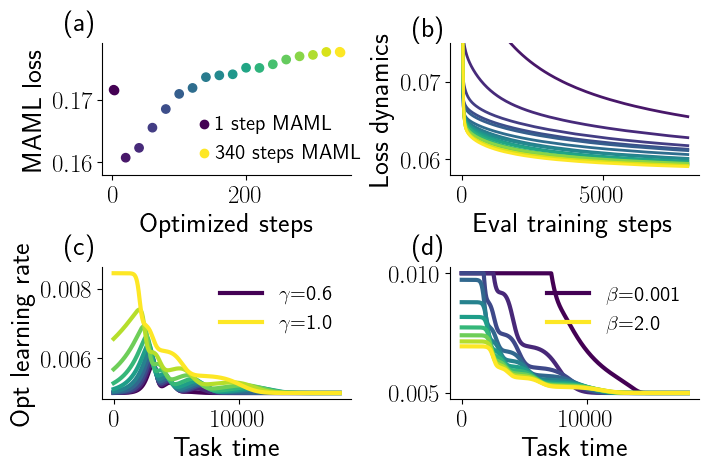

In [12]:
figsize = np.array((7, 6/5*3.5))*1.1
fontsize = 20
weight_legend_pos = (0.25, 0.6)
subplot_labels = np.array(["(a)", "(b)"])

f, ax = plt.subplots(2, 2, figsize=figsize)

ax1 = ax[0, :]
ax2 = ax[1, :]

plot_maml_results(ax=ax1, maml_pre_processed=pre_processed_maml, fontsize=fontsize, 
                  min_variable_label="1 step MAML", max_variable_label="340 steps MAML", min_variable=1, max_variable=340, line_width=2,
                  weight_legend_pos = weight_legend_pos, subplot_labels=subplot_labels, handletextpad=-0.5)

ax1[0].set_ylim([0.158, 0.179])
figsize = np.array((8, 6/5*3.5/2))*1.1
fontsize = 20
subplot_labels = "(c)"
y_label = "Opt learning rate"

results_path = "../results/sweep_learning_rate_v2/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(0, 10)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
gammas = np.linspace(0.6, 1.0, 10, endpoint=True)

plot_optimal_lr(ax2[0], spec_path_list=spec_path_list, var_sweep=gammas, var_label=r"$\gamma$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label)


# ax2[0].set_yscale("log")

y_label = None
results_path = "../results/sweep_learning_rate/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(20, 30)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
betas = np.linspace(1e-3, 2, 10, endpoint=True)

subplot_labels = "(d)"

plot_optimal_lr(ax2[1], spec_path_list=spec_path_list, var_sweep=betas, var_label=r"$\beta$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label)
# ax2[1].set_yscale("log")

plt.subplots_adjust(hspace=0.7, wspace=0.4)

plt.savefig("./paper_v2/maml.pdf", bbox_inches="tight")